# **Impact of Oil Spills on Marine and Coastal Ecosystems: Deepwater Horizon Incident**

## **Problem:** 

Investigating the impact of the 2010 Deep Water Horizon Oil Spill on the marine and coastal life in the Gulf of Mexico region over the years.

## **Background**

Oil spills and pollution in the ocean can have devastating effects on marine life and coastal ecosystems, and they happen to be a consequence of oil dependency and depletion of oil reserves.  Offshore drilling using deep water rigs is one way to extract the resource.  However, drilling for oil in the ocean comes with some detriments, one of them being that oil can leak into the ocean during instrument malfunction or rig explosion.  When oil spills into the sea, it "initially spreads over the water surface as a slick a few millimeters thick" [1].  Rough sea conditions and waves can make the oil slick worse, and if there is a lot of oil or minimal dispersion, damage to wildlife can occur [1]. 

One of the most devastating and infamous oil spills in recent history was the 2010 Deepwater Horizon oil spill in the Gulf of Mexico.  On April 20, 2010, there was an explosion and gas blowout on the Deepwater Horizon drilling rig that resulted in an oil leak that continued polluting the water for 87 days until the well was capped [2].  All in all, over "3.19 million barrels of oil were released into the ocean during the spill, in addition to several hundred thousand tons of hydrocarbon gases" [2].  Ocean currents carried oil away from the site of the explosion towards the coasts and beaches, and large cleanup operations were implemented to contain and remove the oil as well as to help the marine ecosystems recover. 

## **Research Questions:**

   1. What are the effects of oil spills on birds?  
       * How much more severe are effects on birds closer to where the oil spill originated vs farther away?
       
   2. How do oil spills impact local fishing and coastal economies?
   
   3. What is the effect of oil on fish?

## **Justification**

## **Dataset:**

## **Analysis:**

#### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as cx

#### Effects of Oil Spills on Birds

In [4]:
## Reading in Bird Datasets
bird_health_df = pd.read_excel("data/birds.xlsx",sheet_name="Capture and Health")
bird_vhf_df = pd.read_excel('data/birds.xlsx',sheet_name="VHF Telemetry")
bird_sat_df = pd.read_excel('data/birds.xlsx',sheet_name="Satellite Telemetry")
bird_amoy_df = pd.read_excel('data/birds.xlsx',sheet_name="AMOY Survey")

In [5]:
# Taking a look at the data provided
bird_health_df.head()

,Data Publication Date,Data Publication Reference,Study Reference Number,Study Name,Capture ID,Bird Code,Common Name,Scientific Name,FWS Band,Color Band,...,Blood Feather Comments,Release Health ID,Release Breathing,Release Attitude,Release Comments,NA Health ID,NA Breathing,NA Attitude,NA Comments,Field Data Verification Status
0,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",13,AMOY-012,American Oystercatcher,Haematopus palliatus,1106-16404,CMR(C5),...,NaN,6435.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway
1,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",14,AMOY-013,American Oystercatcher,Haematopus palliatus,1106-16312,MR(C0),...,NaN,6440.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway
2,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",15,AMOY-014,American Oystercatcher,Haematopus palliatus,1106-16313,MR(F0),...,NaN,6445.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway
3,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",16,AMOY-015,American Oystercatcher,Haematopus palliatus,1106-16311,MR (E2),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Underway
4,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",17,AMOY-016,American Oystercatcher,Haematopus palliatus,1106-16314,MR(H1),...,NaN,6468.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway


##### Cleaning the Data

In [8]:
## Condensing data to just the latitude, longitude, and visual oiling columns for plotting
birdOil = bird_health_df[['Capture Latitude', 'Capture Longitude', 'Visual Oiling']]

# Removing rows that don't have oil observations from the dataframe
birdOil = birdOil[birdOil['Visual Oiling'] != 'Not assessment of oil on bird by visual evaluation.']
birdOil = birdOil[birdOil['Visual Oiling'] != 'No oil detected on bird by visual evaluation.']

# Shortening the names of visual oiling description to Trace, Light, Moderate, and Heavy
birdOil['Visual Oiling'] = birdOil['Visual Oiling'].apply(lambda x: x.split(' ')[0])
# Renaming columns
birdOil.rename(columns={'Visual Oiling':'oiling', 'Capture Latitude': 'latitude', 'Capture Longitude':'longitude'},inplace=True)

##### Plotting the Data

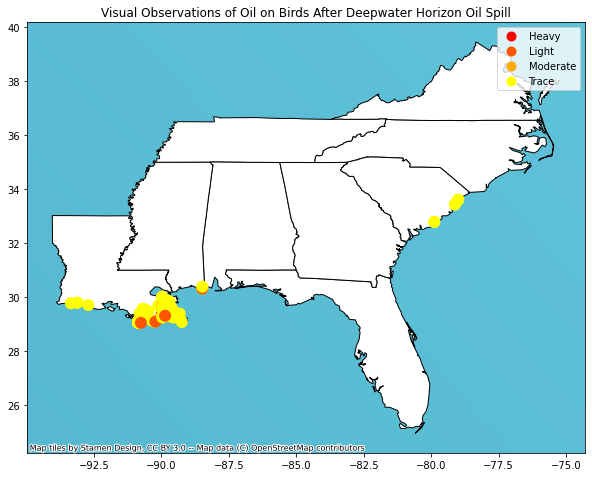

In [12]:
geodf = gpd.GeoDataFrame(birdOil,geometry=gpd.points_from_xy(birdOil.longitude,birdOil.latitude))

states = gpd.read_file('data/maps/States_shapefile.shp')
southeast = states[states['State_Code'].isin(['FL','GA','AL','SC','NC', 'TN', 'LA', 'MS', 'VA'])]
ax = southeast.plot(color = 'white',edgecolor='black',figsize=(10,10),legend=True)
geodf.plot(ax=ax,column='oiling',legend=True,figsize=(12,12),marker='o',linewidth=6,cmap='autumn')
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=12)

plt.title("Visual Observations of Oil on Birds After Deepwater Horizon Oil Spill")
plt.show()

With this map visualization, it can be seen that the oil from the Deepwater Horizon spill affected birds that weren't even in the direct vicinity of the original impact zone.  The data collected shows that birds as far away as Louisiana and South Carolina were observed with oil on their bodies and feathers.  This alludes to the reason why open water oil spills are so dangerous (especially ones that aren't cleaned up right away like the Deepwater Horizon incident); the currents in the ocean can cause the oil to disperse, impacting more wildlife

## **Ethical Concerns:**